In [79]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
#set the path to the dataset
data_dir = 'C:\\Users\\user\Documents\\Tensorflow2\\DATA\\cell_images'

In [3]:
#show directories in the folder
os.listdir(data_dir)

['test', 'train']

In [4]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [5]:
test_path

'C:\\Users\\user\\Documents\\Tensorflow2\\DATA\\cell_images\\test\\'

In [6]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [8]:
#inspect a single parasitized image
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [9]:
#read in the image using imread()
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
#check the shape of the dataset
imread(para_cell).shape

(148, 142, 3)

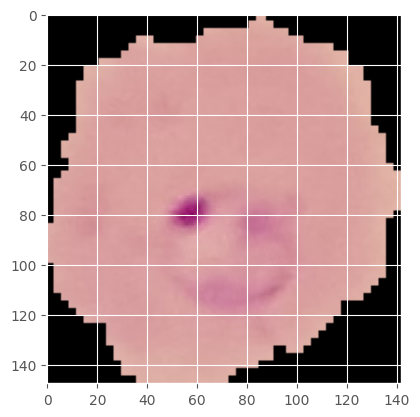

In [11]:
plt.imshow(imread(para_cell));

In [12]:
#inspect a single parasitized image
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [13]:
uninfected_cell = train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

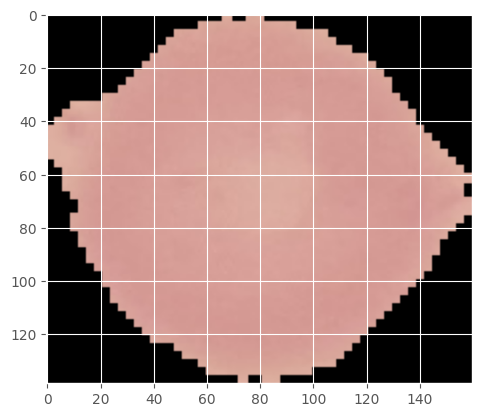

In [14]:
plt.imshow(imread(uninfected_cell));

#### check the number of images in our dataset

* Training Data

In [15]:
len(os.listdir(train_path+'parasitized')) 

12480

In [16]:
len(os.listdir(train_path+'uninfected')) 

12480

* Testing Data

In [17]:
len(os.listdir(test_path+'parasitized')) 

1300

In [18]:
len(os.listdir(test_path+'uninfected')) 

1300

#### Inspect the dimensions of the images in the dataset and determine the average

In [19]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path +'uninfected'):
    img = imread(test_path+'uninfected\\' +image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [20]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


In [21]:
dim2

[118,
 145,
 151,
 145,
 139,
 136,
 160,
 121,
 142,
 121,
 100,
 151,
 139,
 151,
 112,
 124,
 145,
 115,
 166,
 130,
 133,
 130,
 136,
 136,
 124,
 115,
 142,
 190,
 151,
 163,
 112,
 142,
 151,
 127,
 142,
 172,
 151,
 127,
 154,
 91,
 124,
 139,
 124,
 127,
 148,
 118,
 148,
 157,
 139,
 145,
 154,
 163,
 148,
 130,
 160,
 136,
 121,
 169,
 145,
 115,
 106,
 124,
 130,
 112,
 124,
 106,
 112,
 121,
 100,
 115,
 136,
 118,
 127,
 148,
 130,
 118,
 124,
 139,
 133,
 118,
 121,
 127,
 136,
 127,
 124,
 124,
 136,
 130,
 130,
 112,
 127,
 136,
 130,
 124,
 130,
 109,
 169,
 124,
 142,
 127,
 106,
 130,
 97,
 100,
 145,
 106,
 148,
 136,
 136,
 133,
 121,
 133,
 136,
 157,
 133,
 139,
 127,
 139,
 151,
 157,
 148,
 163,
 145,
 136,
 127,
 130,
 160,
 133,
 130,
 121,
 136,
 145,
 121,
 142,
 148,
 148,
 127,
 139,
 148,
 148,
 151,
 160,
 154,
 145,
 139,
 127,
 121,
 106,
 106,
 145,
 112,
 130,
 124,
 139,
 145,
 142,
 151,
 130,
 118,
 133,
 154,
 136,
 139,
 121,
 142,
 148,
 136,


* plot a histogram of the image dimensions to see the distribution

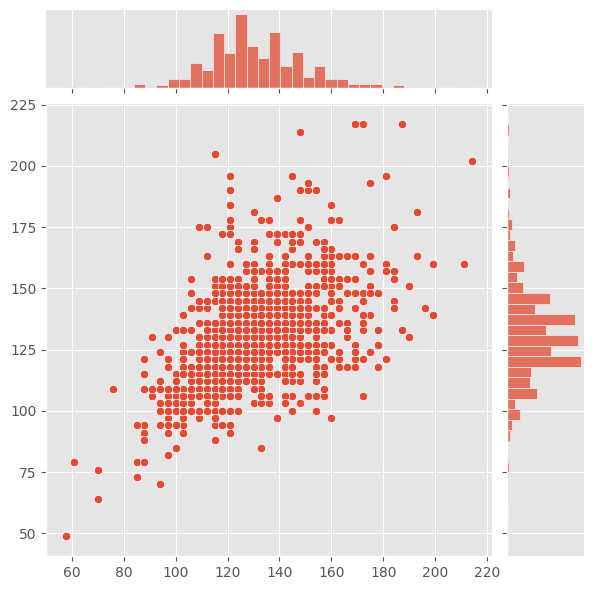

In [22]:
sns.jointplot(x=dim1, y=dim2);

In [23]:
np.mean(dim1)

130.92538461538462

In [24]:
np.mean(dim2)

130.75

We note from the plot that the images are centered around 130 by 130

In [25]:
image_shape = (130,130,3)

#### Data Preprocessing using image data generator

In [26]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [27]:
#use random transformations to increase the number of images if you have a small dataset--
#image_gen.random_transform(images)

#### Generating many manipulated images from a directory

In [28]:
#train batches
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [29]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


#### Modeling

In [32]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Model summary

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)      

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [35]:
batch_size=16

#### Create the image generators for model training and testing

In [36]:
#train batches
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [39]:
#test batches
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle=False)

Found 2600 images belonging to 2 classes.


In [41]:
#inspect the labels in the training batch data
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [42]:
results = model.fit_generator(train_image_gen, epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 353s 225ms/step - loss: 0.7220 - accuracy: 0.5489 - val_loss: 0.6791 - val_accuracy: 0.5877
Epoch 2/20
1560/1560 [==============================] - 309s 198ms/step - loss: 0.6766 - accuracy: 0.5865 - val_loss: 0.6773 - val_accuracy: 0.5731
Epoch 3/20
1560/1560 [==============================] - 294s 189ms/step - loss: 0.6685 - accuracy: 0.5975 - val_loss: 0.6594 - val_accuracy: 0.6135
Epoch 4/20
1560/1560 [==============================] - 278s 178ms/step - loss: 0.3771 - accuracy: 0.8283 - val_loss: 0.1912 - val_accuracy: 0.9369
Epoch 5/20
1560/1560 [==============================] - 245s 157ms/step - loss: 0.1901 - accuracy: 0.9366 - val_loss: 0.1754 - val_accuracy: 0.9404
Epoch 6/20
1560/1560 [==============================] - 290s 186ms/step - loss: 0.1774 - accuracy: 0.9420 - val_loss: 0.1721 - val_accuracy: 0.9458
Epoch 7/20
1560/1560 [==============================] - 290s 186ms/step - loss: 0.1750 - accuracy: 0.9447 - val_

#### Model Evaluation

In [58]:
metrics = pd.DataFrame(model.history.history)

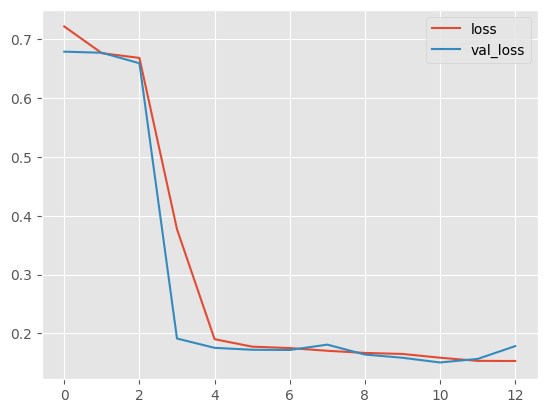

In [52]:
metrics[['loss','val_loss']].plot();

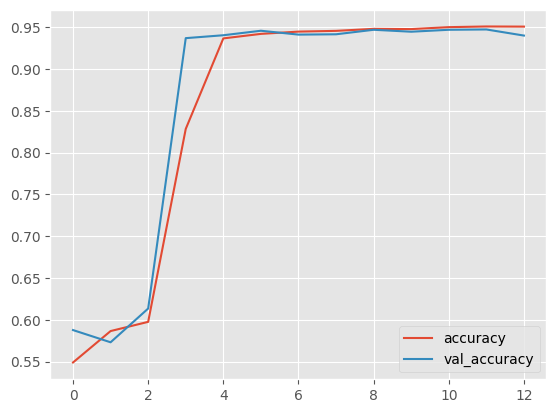

In [53]:
metrics[['accuracy','val_accuracy']].plot();

In [54]:
#check the metrics in the data
model.metrics_names

['loss', 'accuracy']

In [56]:
model.evaluate_generator(test_image_gen, verbose=0)

[0.17328032851219177, 0.9438461661338806]

#### Save the Model

In [59]:
model.save('malaria_detector.h5')

#### Load the Model

In [62]:
saved_model = load_model('malaria_detector.h5')

#### Make Predictions

In [63]:
pred = saved_model.predict_generator(test_image_gen)

In [65]:
predictions = pred > 0.5

In [66]:
predictions 

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [67]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1300
           1       0.91      0.98      0.95      1300

    accuracy                           0.94      2600
   macro avg       0.95      0.94      0.94      2600
weighted avg       0.95      0.94      0.94      2600



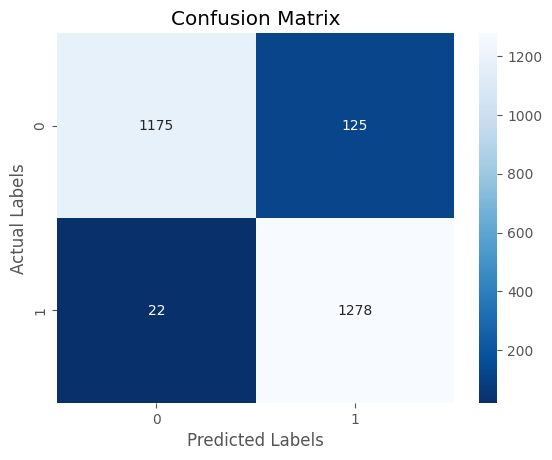

In [77]:
sns.heatmap(confusion_matrix(test_image_gen.classes, predictions), annot=True, cmap="Blues_r", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix");

#### predict on a single image

In [81]:
my_image = image.load_img(para_cell, target_size=image_shape)

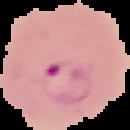

In [82]:
my_image

In [83]:
#convert image to an array format
my_img_arr = image.img_to_array(my_image)

In [84]:
#expand the array dimension to include the batch size
my_img_arr = np.expand_dims(my_img_arr, axis=0)

In [85]:
my_img_arr.shape

(1, 130, 130, 3)

In [91]:
threshold = 0.5  # Set a threshold value

# Make predictions
predictions = saved_model.predict(my_img_arr, verbose=0)

# Apply threshold for classification
if predictions >= threshold:
    predicted_class = 1  # Uninfected
else:
    predicted_class = 0  # Parasitized

print("Predicted class:", predicted_class)


Predicted class: 0
